In [4]:
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

    100% |████████████████████████████████| 215kB 12.1MB/s ta 0:00:01
    100% |████████████████████████████████| 31.2MB 85kB/s  eta 0:00:01    82% |██████████████████████████▌     | 25.8MB 46.9MB/s eta 0:00:01
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
df = pd.read_csv('boulder_weather.csv')
df.head()

,STATION,NAME,DATE,PRCP,TMAX,TMIN
0,USW00094075,"BOULDER 14 W, CO US",2017-07-01,0.00,68.0,31.0
1,USW00094075,"BOULDER 14 W, CO US",2017-07-02,0.00,73.0,35.0
2,USW00094075,"BOULDER 14 W, CO US",2017-07-03,0.00,68.0,46.0
3,USW00094075,"BOULDER 14 W, CO US",2017-07-04,0.05,68.0,43.0
4,USW00094075,"BOULDER 14 W, CO US",2017-07-05,0.01,73.0,40.0


## Histograms
Recall that we can begin exploring our data from a statistical point of view by visually inspecting a histogram of our variables. To do this for all variables all at once, we can use the pd.plotting.scatter_matrix(df) (diagonal entries are histogram distributions of that variable, off cells are correlation plots of two variables against each other).

In [6]:
# Seaborn makes everything so pretty! Check out details here:
# This is optional but makes a nice design for all of our proceeding graphs
sns.set_style('darkgrid')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd09e2fdef0>,
      dtype=object)

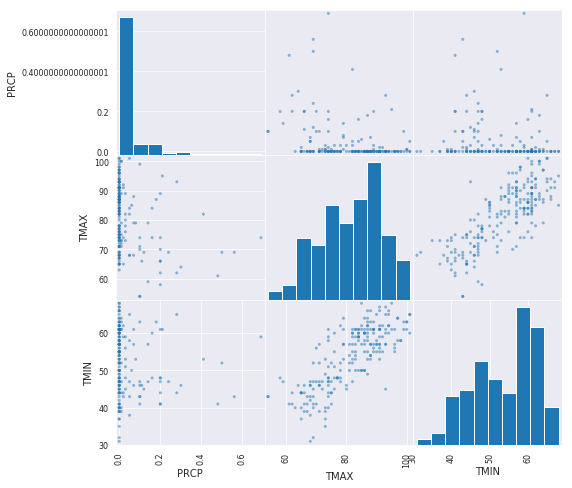

In [7]:
pd.plotting.scatter_matrix(df, figsize=(8,8))

 Alternatively or to inspect the distributon of a single variable we can use pandas built in .hist() method:

In [ ]:
df.PRCP.hist()
plt.title('Histogram of Daily Percipitation for Boulder CO.')
plt.xlabel('Daily Percipitation')
plt.ylabel('Number of Days')

Text(0, 0.5, 'Number of Days')

## Probability Mass Functions (PMFs)
Probability mass functions are essentially normalized histograms. They show the probability (or normalized frequency) of each event occuring.

Doing this with pandas built in histogram method is sadly slightly verbose.  
To do so we have to create weights so that each occurence is counted as 1/number observations rather then 1.

Text(0,0.5,'Number of Days')

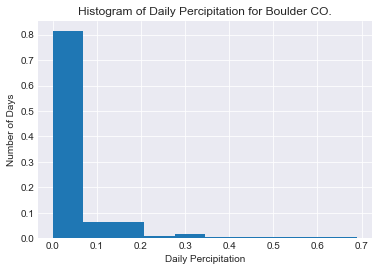

In [84]:
num_obs = len(df[~df.PRCP.isnull()]) #Count the number of non null values
w = [1/num_obs for i in range(num_obs)] #Create an array of weights
df.PRCP.hist(weights = w)
plt.title('Histogram of Daily Percipitation for Boulder CO.')
plt.xlabel('Daily Percipitation')
plt.ylabel('Number of Days')

#### You should also note how different these graphs begin to look if we drastically alter the number of bins:

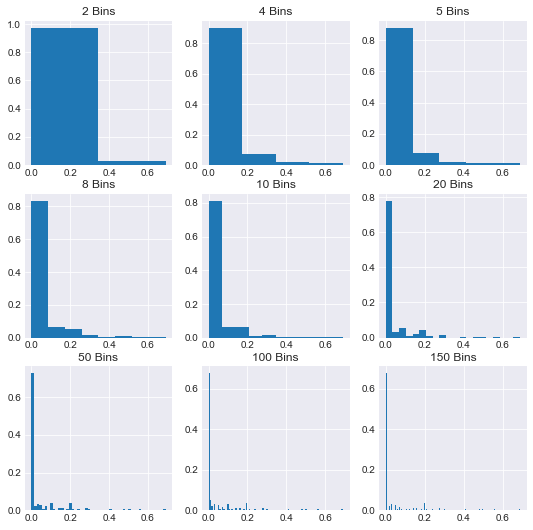

In [89]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9,9))
bins_options = [2,4,5,8,10,20,50,100,150]
for n in range(9):
    i, j = n//3, n%3
    df.PRCP.hist(ax=axes[i,j], bins=bins_options[n], weights=w)
    ax=axes[i,j]
    ax.set_title('{} Bins'.format(bins_options[n]))

## Cumulative Distribution Functions CDFs
Due to this problem with binning, it's also often helpful to visualize everything as a cumulative distribution; the further and further to the right you go the closer to having viewed all possible outcomes/observations. This is only a minor change to our previous code; set the optional paramater **cumulative** to True:

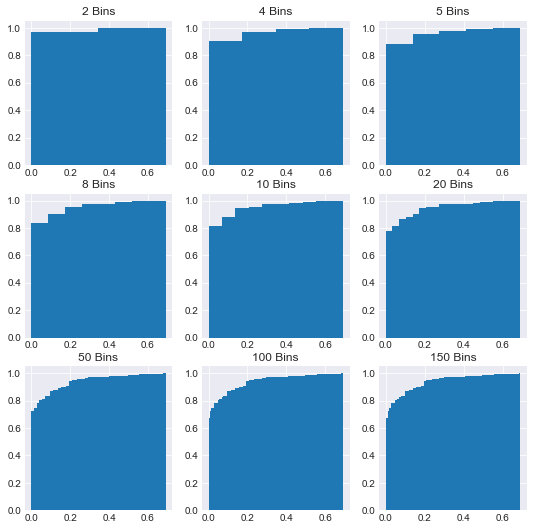

In [91]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9,9))
bins_options = [2,4,5,8,10,20,50,100,150]
for n in range(9):
    i, j = n//3, n%3
    df.PRCP.hist(ax=axes[i,j], bins=bins_options[n], weights=w, cumulative=True)
    ax=axes[i,j]
    ax.set_title('{} Bins'.format(bins_options[n]))

So far we've viewed empirical distributions of observations. Ultimately, our goal is to model these variables so we'll now turn to some analytical or theoretical distributions and compare their properties. In the end, this will provide us further tools to analyze datasets.

# Exercises
* Create two different histograms, one depicting rainfall in the first week of July, and a second depicting rainfall the last week of July. Which week was rainier?